In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  2017nat_housing_survey1.csv

Source: American Housing Survey by US Census Bureau

https://www.census.gov/programs-surveys/ahs/data/2017/ahs-2017-public-use-file--puf-/2017-ahs-metropolitan-puf-microdata.html


In [3]:
# File to Load 
file_to_load = "../dataset/data_cleanOutliers.csv"

# Read Purchasing File and store into Pandas data frame
housing_data = pd.read_csv(file_to_load)
housing_data.head(10)

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,outliers
0,11000001,37980,307811.0,8,2000,6.0,3,4,2,1
1,11000005,99998,229992.0,8,1970,6.0,4,5,2,1
2,11000006,99998,132220.0,5,1980,4.0,3,3,2,1
3,11000007,37980,271584.0,8,1960,7.0,4,4,2,1
4,11000013,37980,573123.0,8,1980,8.0,3,4,2,1
5,11000015,37980,153023.0,6,1950,4.0,3,2,3,1
6,11000016,37980,248031.0,6,1980,4.0,3,2,2,1
7,11000017,37980,287408.0,7,1950,6.0,3,4,2,1
8,11000023,37980,208364.0,7,1950,4.0,3,2,2,1
9,11000031,99998,39589.0,5,1940,3.0,2,3,2,1


# Data Visualization

In [4]:
# Build X and y
X = housing_data[["TOTROOMS", "BATHROOMS", "UNITSIZE"]].values
y = housing_data["MARKETVAL"].values
print(X.shape, y.shape)

(24385, 3) (24385,)


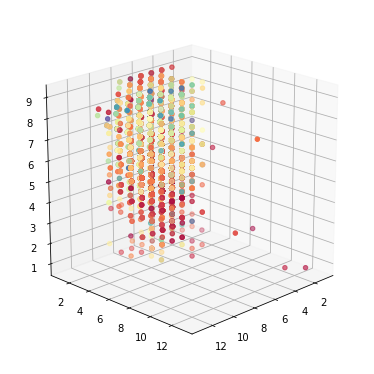

In [5]:
# Let's see what the data looks like

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))

plt.savefig("../output/MultiLinear_National_Clean_Data.png", bbox_inches='tight')
plt.show()

## Build model

In [6]:
from sklearn.model_selection import train_test_split

X = housing_data[["TOTROOMS", "BATHROOMS", "UNITSIZE"]]
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)

(18288, 3) (18288, 1)


In [7]:
print(X_test.shape, y_test.shape)

(6097, 3) (6097, 1)


In [8]:
# Results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_train, y_train)

print('R2: ', score)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

R2:  0.2578777222910683
Weight coefficients:  [[17519.01370917 25632.17046854 20672.77141826]]
y-axis intercept:  [-60080.57649593]


## Predict

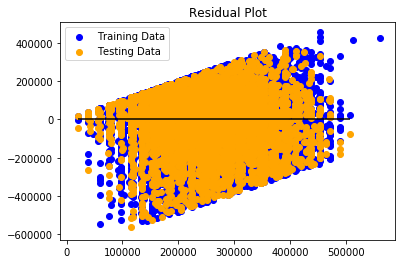

In [9]:
# Build Residual Plot
prediction = model.predict(X_test)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(prediction, prediction - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=prediction.min(), xmax=prediction.max())
plt.title("Residual Plot")

plt.savefig("../output/MultiLinear_National_Clean_Residual.png", bbox_inches='tight')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
MSE = mean_squared_error(y_test, prediction)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 18692623780.979923, R2: 0.24870462251035907
